In [1]:
from clusterga.ga import ga
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin

In [2]:
df = pd.read_csv('./data/data.csv', delimiter=';')
df2 = pd.read_csv('./data/data2.csv', delimiter=';')
a = df2['Z-Estimate'].tolist()
df['Z2-Estimate'] = a
df = df[['Z-Estimate', 'Z2-Estimate']]
X = df.values
BBox = ((df2['X-Coordinate'].min(),   df2['X-Coordinate'].max(),      
         df2['Y-Coordinate'].min(), df2['Y-Coordinate'].max()))

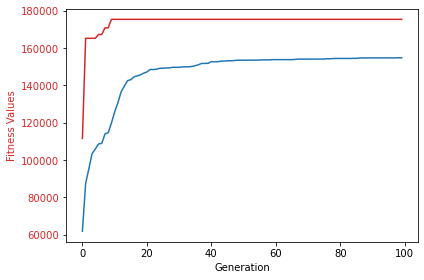

CPU times: user 5min 7s, sys: 14 s, total: 5min 21s
Wall time: 53.9 s


In [3]:
%%time
individual = ga(X,fitness_function="CalinskiHarabaz", gen=100, 
                p_crossover=0.5, p_mutation=0.1,selection_operator="Tournament", seed=20 )

In [4]:
individual.chromosome

array([[14.48946773,  5.217286  ],
       [15.39950206,  5.19175925]])

In [5]:
individual.value

175273.42511700044

In [6]:
Y = pairwise_distances_argmin(X, individual.chromosome)

(8437942.5, 8438285.5)

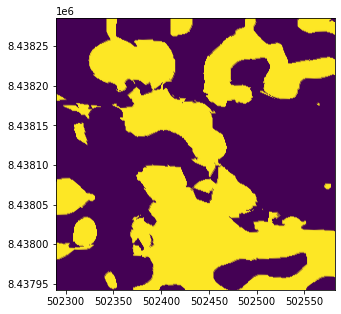

In [7]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(df2['X-Coordinate'], df2['Y-Coordinate'], zorder=1, alpha= 1.0, 
           c=Y, s=5)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

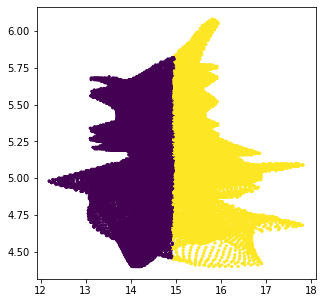

In [8]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(X[:, 0], X[:, 1], zorder=1, alpha= 1.0, 
           c=Y, s=5)

In [9]:
def describe(X, Y):
    for i in np.unique(Y):
        members_cluster = X[i == Y]
        print("Quandidade de amostras no grupo {}: {}".format(i, members_cluster.shape[0]))
        print("Média do grupo {}: {}".format(i, np.mean(members_cluster, axis=0)))
        print("Variancia do grupo {}: {}".format(i, np.var(members_cluster, axis=0)))
        print()
        print()

In [10]:
describe(X, Y)

Quandidade de amostras no grupo 0: 59065
Média do grupo 0: [14.48605333  5.21069991]
Variancia do grupo 0: [0.16834059 0.06439263]


Quandidade de amostras no grupo 1: 41727
Média do grupo 1: [15.3956769  5.2013248]
Variancia do grupo 1: [0.20353979 0.08748105]




In [11]:
np.mean(X, axis=0)

array([14.86262947,  5.2068187 ])

In [12]:
np.var(X, axis=0)

array([0.38364569, 0.07397236])

In [ ]:
%%time
individual = ga(X,fitness_function="FPC", gen=100, 
                p_crossover=0.5, p_mutation=0.1,selection_operator="Tournament", seed=20 )

In [ ]:
individual.chromosome